We ask each of you to prepare a 20 minute talk, spending 10 minutes presenting an aspect of your current/recent research, and 10 minutes addressing the bigger picture of what you are trying to advance or achieve with the kind of research you do. For example, you might have particular theoretical ambitions, or political commitments. What is the broader intellectual movement to which your research aims to contribute? We will have 10 minutes for discussion after each presentation. 

In [1]:
from IPython.core.display import display, HTML # for max width
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
from spacy.tokens import Doc, Span, Token
import scattertext as st
from IPython.display import IFrame
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import spatial
cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)
import spacy # software for analysing text
from spacy import displacy
nlp = spacy.load('en_core_web_md') # a medium english language model
import warnings
warnings.filterwarnings('ignore')
print('Notebook loaded successfully')

Notebook loaded successfully


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Guiding-Questions" data-toc-modified-id="Guiding-Questions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Guiding Questions</a></span><ul class="toc-item"><li><span><a href="#Inspirations" data-toc-modified-id="Inspirations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Inspirations</a></span></li></ul></li><li><span><a href="#Why-should-Sociocultural-Psychology-Care-About-'Big-Data'-and-'AI'?" data-toc-modified-id="Why-should-Sociocultural-Psychology-Care-About-'Big-Data'-and-'AI'?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Why should Sociocultural Psychology Care About 'Big Data' and 'AI'?</a></span></li><li><span><a href="#Meaning-&amp;-Machine-Learning" data-toc-modified-id="Meaning-&amp;-Machine-Learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Meaning &amp; Machine Learning</a></span><ul class="toc-item"><li><span><a href="#How-Similar-are-Words?" data-toc-modified-id="How-Similar-are-Words?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>How Similar are Words?</a></span></li><li><span><a href="#How-Similar-are-Sentences?" data-toc-modified-id="How-Similar-are-Sentences?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>How Similar are Sentences?</a></span></li><li><span><a href="#Adding-and-Subtracting-Meanings?" data-toc-modified-id="Adding-and-Subtracting-Meanings?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Adding and Subtracting Meanings?</a></span></li><li><span><a href="#'Thought-Vectors'" data-toc-modified-id="'Thought-Vectors'-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>'Thought Vectors'</a></span></li></ul></li><li><span><a href="#Hospital-Staff-Responding-to-Criticism" data-toc-modified-id="Hospital-Staff-Responding-to-Criticism-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hospital Staff Responding to Criticism</a></span><ul class="toc-item"><li><span><a href="#Past-Tense-Verbs" data-toc-modified-id="Past-Tense-Verbs-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Past Tense Verbs</a></span></li></ul></li><li><span><a href="#Clinical-observations-or-patient-'experiences'?" data-toc-modified-id="Clinical-observations-or-patient-'experiences'?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Clinical observations or patient 'experiences'?</a></span></li><li><span><a href="#Which-responses-have-least-perspective-taking?" data-toc-modified-id="Which-responses-have-least-perspective-taking?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Which responses have least perspective taking?</a></span></li><li><span><a href="#Which-responses-have-most-psychological-distancing?" data-toc-modified-id="Which-responses-have-most-psychological-distancing?-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Which responses have most psychological distancing?</a></span></li></ul></div>

# Guiding Questions

- Like most sociocultural psychologists, I have been concered with the constitutive and creative potential of social interaction. But, dialogue, social interaction, and perspective-taking rarely lead to any transformation. 
- Thus my question has become: how is social interaction non-transformative? What blocks learning and creativity in social interaction? And how do people protect themselves from the perspective of the other?


I focus on the clash of perspectives at two levels:
1. What are the differences between perspectives in the social world?
2. What are the differences between perspectives within individuals?


##  Inspirations
- Dewey, James, Mead, Bakhtin, Vygotksy, Wittgenstein, Markova, Linell
- Recent developments in 'natural language processing' or 'machine learning'


# Why should Sociocultural Psychology Care About 'Big Data' and 'AI'?

A lot of big data is text and image - and this is the bread and butter of sociocultural psychology. Indeed, analysis of the big data from the Hadron Colider is actually relatively straightforward compared to analysing all the text and images on the internet. Google, Facebook, etc. are investing vast resources in making computers understand text, image and sound in a way that matters for humans. 

Here are some example studies that are using basic text analysis approaches to understand sociocultural issues. 

__Digital Humanities__

Boyd, R. L., & Pennebaker, J. W. (2015). [Did Shakespeare write Double Falsehood? Identifying individuals by creating psychological signatures with text analysis.](http://elizabethan-theatre.org/wps/wp-content/uploads/2015/07/Double-Falsehood-by-Ryan-Boyd-Psychological-Science-2015.pdf) Psychological science, 26(5), 570-582.

Jänicke, S., Franzini, G., Cheema, M. F., & Scheuermann, G. (2017, September). [Visual text analysis in digital humanities.](https://pdfs.semanticscholar.org/3b83/ce394c898b54c982c62f216e9d200c392e99.pdf) In Computer Graphics Forum (Vol. 36, No. 6, pp. 226-250).

__Personality__

Pennebaker, J. W., & Lay, T. C. (2002). [Language use and personality during crises: Analyses of Mayor Rudolph Giuliani's press conferences.](https://www.sciencedirect.com/science/article/abs/pii/S0092656602923494) Journal of Research in Personality, 36(3), 271-282.

Yarkoni, T. (2010). [Personality in 100,000 words: A large-scale analysis of personality and word use among bloggers.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2885844/?_escaped_fragment_=po=2.77778) Journal of research in personality, 44(3), 363-373.

__Collective Emotions__

Tausczik, Y., Faasse, K., Pennebaker, J. W., & Petrie, K. J. (2012). [Public anxiety and information seeking following the H1N1 outbreak: blogs, newspaper articles, and Wikipedia visits.](https://www.tandfonline.com/doi/abs/10.1080/10410236.2011.571759) Health communication, 27(2), 179-185.

Bollen, J., Mao, H., & Zeng, X. (2011). [Twitter mood predicts the stock market.](https://arxiv.org/pdf/1010.3003&) Journal of computational science, 2(1), 1-8.

But, all these studies are mainly using fairly basic word count techniques, or, slightly more advanced sentiment analysis.

# Meaning & Machine Learning

Word vectors, or 'word embeddings', have become super popular (Yoshua Bengio, Geoffrey Hinton), due to some almost magical properties. Before about 2013, most computational analysis of words focused on the textual appearance of a word; for example, 'dog' was close to 'god' (same letters) and 'hog' (2 letters in the same order), but far from 'cat' (no similar letters). There seemed to be no way to make computers understand that 'dog' and 'cat' are actually quite close semantically.

The breakthrough came from a Wittgenstein (1953) insight: the meaning of words comes from the context in which they are used. Consider the sentence 'the X sat on the mat' - most people would agree that 'dog' and 'cat' are both plausible candidates for X. That is to say, 'dog' and 'cat' occupy similar roles within similar sentences. Word embeddings encode the meaning of words not in terms of the words themselves, but, in terms of the context in which the words appear. 

By analyzing billions of webpages and books, statistical models are built based on which words occur in the same context. These models _seem_ to encode meaning.

## How Similar are Words?
Most people would agree that 'dog' is more similar to 'cat' than 'road' - and the models agree:

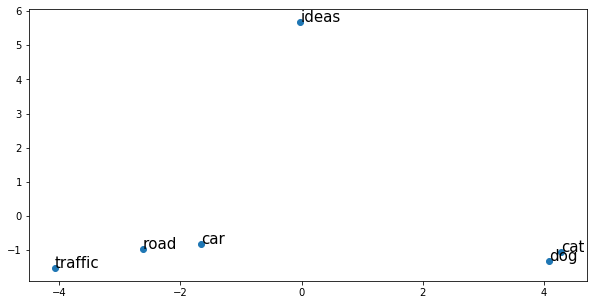

In [2]:
words = ['dog', 'cat', 'car', 'road', 'traffic', 'ideas']

# calculate similarities
pca = PCA(n_components=2)
pca.fit([nlp(word).vector for word in words])
word_vecs_2d = pca.transform([nlp(word).vector for word in words])

# create plot 
plt.figure(figsize=(10,5))
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])
# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)
# show the plot
plt.show()

## How Similar are Sentences?

We can also use these models to compare sentences. Consider the following (all using unique words). Just by averaging the word embeddings for each sentence, we can see, that the model corresponds broadly to our human judgement. <br>
<br>
Change the sentences and re-run the cell to see the result.

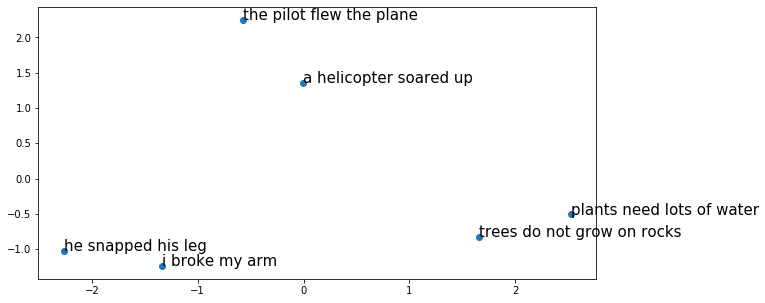

In [3]:
words = ['the pilot flew the plane', 
         'trees do not grow on rocks',
         'i broke my arm', 
         'he snapped his leg',
         'a helicopter soared up',
         'plants need lots of water']

# calculate similarities
pca = PCA(n_components=2)
pca.fit([nlp(word).vector for word in words])
word_vecs_2d = pca.transform([nlp(word).vector for word in words])

# create plot 
plt.figure(figsize=(10,5))
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])
# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)
# show the plot
plt.show()

The above is a tiny visualisation. Google and other companies are applying similar methods to [map the meaning of all words](https://projector.tensorflow.org/) - created by analysing the sentence context in which words are used accross all books, webpages, news sources and other archives. Most of the mapping done so far is based on individual words and phrases, but, current research is focusing on sentences, paragraphs, and larger units. This will enable people to compare the similarity of large bodies of text.

## Adding and Subtracting Meanings?
If words are represented as numbers, then, can we do mathematics with the meanings?

What if we start with the meaning of 'king' subtract 'man' and add 'woman' - what would the outcome be?
- Try: 'uk' minus 'london' add 'geneva'
- Try: 'berlin' minus 'germany' add 'france'
- Try: 'india' minus 'curry' add 'pizza'
- Try: 'man' minus 'boy' add 'girl'


In [4]:
start = 'king'
subtract = 'man'
add = 'woman'

x = nlp.vocab[start].vector - nlp.vocab[subtract].vector + nlp.vocab[add].vector

similar_words = []
for word in nlp.vocab:
    if not (word.has_vector & word.is_lower):
        continue
    if not ((word.text!=start)&(word.text!=add)&(word.text!=subtract)):
        continue
 
    similarity = cosine_similarity(x, word.vector)
    similar_words.append((word, similarity))
    
similar_words = sorted(similar_words, key=lambda item: -item[1])
result = [w[0].text for w in similar_words[:1]][0]
print(f"'{start}' minus '{subtract}' add '{add}' = {result}")

'king' minus 'man' add 'woman' = queen


## 'Thought Vectors'

Geoffrey Hinton, one of the developers of 'deep learning' techniques, talks about the above examples that focus on single words as only the first step: he (and Google) are working towards 'thought vectors'. While the above examples represent the meanings of words in a 300 dimensional mathematical space, they aim to map thoughts, ideas, sentences, and even whole articles and books into a multi-million dimensional space.

If this works, it will not only make Google a lot of money, but, it will have a huge impact on research, including sociocultural research.
- Transcripts, textual data, and even visual or auditory data can be searched for high level meanings, including emotion, abstraction, contradictions, and dialogical tensions
- Longitudinal analyses of large datasets become possible
- We can compare ideas between individuals and groups
- Novelty emerging out of an interaction can be specified and searched
- Emerging conflicts of perspective can be monitored in real-time
- Trajectories of meaning, within individuals, or accross individuals, can be mapped out
- Enables sociocultural psychology to evidence core ideas at a much bigger scale


# Hospital Staff Responding to Criticism 
Accidents in hospitals has become a leading cause of death. At a minimum, 10% of people going into hospital come out with a negative health impact that they did not have initially, due to delays, hospital infections, errors, wrong-site surgery, misdiagnosis, medication errors, not reading patient notes etc. While aviation, construction, and heavy industry have all become much safer over the last 50 years, healthcare has remained dangerous, and seems resistant to improvement.<br>
<br>
 One idea is that medical staff could learn from patients: patients know their own bodies, are usually the only person who has been at all the meetings, and have increasing access to medical knowledge. <br>
 <br>
 Research: Online discussion between patients and staff in the UK (about 250k paired dialogs). Are patients reporting important issues? Are staff listening?

In [5]:
df = pd.read_csv('co_crit3.csv')
df['text_doc'] = df['post_body'].apply(nlp)
df['id'] = df['id'].astype(str)
df['post_type'].value_counts()

story       610
response    508
Name: post_type, dtype: int64

## Past Tense Verbs
Looking at just the past tense verbs reveals a discrepancy:
- Patients are writing about what they 'saw' what they were 'told' and how they 'suffered'
- Staff are responding about vague issues being 'raised', 'posted', 'shared', 'highlighted', and 'experienced'
<br>
- 'died' is mentioned 281 times by patiens but only 4 times by staff
<br>
<br>
<br>


Two findings:
1. psychologisation
2. generic

In [6]:
def getX(doc):
    out = [x.text for x in doc if (x.tag_ in ['VBD'])]
    return nlp(' '.join(out))
df['text_x'] = df['text_doc'].apply(getX)

corpus = st.CorpusFromParsedDocuments(df, 
                                      parsed_col='text_x',
                            category_col='post_type'
                                     ).build()
html = st.produce_scattertext_explorer(corpus,
         category='story',
         category_name='Patient Stories',
         not_category_name='Staff Responses',
         #characteristic_scorer=None,
         alternative_text_field='post_body',
         show_characteristic=False,                              
         width_in_pixels=800)
file_name = 'co_critical_past.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width=1300, height=1000)

# Clinical observations or patient 'experiences'?

Although patient's report serious clinical issues (such as misdiagonises and other errors) and pain; these are rarely acknowledged by hospital staff. Instead, hospital staff prefer to talk about patient 'experiences' whilst also lauding the value of feedback.

In [7]:
topics = {
    'clinical': ['clinical', 'unsafe', 'doctor', 'nurse', 'operation', 'procedure', 'diagnosis', 'misdiagnosis'],
    'pain': ['agony', 'suffering', 'pains', 'suffer', 'screaming'],
    'feedback': ['value', 'feedback', 'learning', 'listen', 'listening'],
    'experience': ['experience', 'concern', 'concerns', 'feelings']
}

topic_feature_builder = st.FeatsFromTopicModel(topics)

#CREATE CORPUS
corpus = st.CorpusFromParsedDocuments(df, 
                                      parsed_col='text_doc',
                                      category_col='post_type',
                                      feats_from_spacy_doc=topic_feature_builder
                                      ).build()

# CREATE PLOT
html = st.produce_scattertext_explorer(corpus,
                                      category='story',
                                      category_name='Patient Criticism',
                                      not_category_name = 'Hospital Response',
                                      width_in_pixels=600,
                                       height_in_pixels=400,
                                      show_characteristic=False,
                                       use_non_text_features=True,
                                       show_top_terms=True,
                                      minimum_term_frequency=5,
                                      use_full_doc=True,
                                      p_value_colors=True,
                                      max_snippets = 11,
                                       pmi_threshold_coefficient=0,
                                    topic_model_term_lists=topic_feature_builder.get_top_model_term_lists()
                                      )
file_name = 'co_critical_topics.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width=1000, height=700)

# Which responses have least perspective taking?

Using the 'word embeddings' method the staff responses can be compared to the original patient stories. This can help identify staff responses that engage with the patient content (i.e., perspective take) and those which are generic, and ignore the content of the feedback.

In [8]:
df_index = 1
df = df.sort_values(by='similarityToOrigin', ascending=True, axis='index').reset_index(drop=True)
selected_row = df.iloc[df_index, :,]
print(f"ORIGINAL POST\n{selected_row[['thread_originText']][0]}")
print(f"STAFF RESPONSE\n{selected_row[['post_body']][0]}")

ORIGINAL POST
I was admitted in November 09 for a total thyroidectomy after being diagnosed with cancer in October (had a hemithyroidectomy in September). The surgery went well, my consultant is a great guy. Ward 21: very busy. However, I hardly dared ask anything when after requesting some pain killers, I was told rather nastily: you're not the only one 'love'; you'll have to wait! And wait I did. For an hour! 
Discharged in the middle of November, whilst complaining of feeling nauseous and tingly but 'you'll be fine' I was told. Got home feeling worse; didn't sleep as I was tingling all over and rang the ward on the next day  at 7 am to ask for advice; I was told to come back straight away before I started 'cramping' and to bring my suitcase with me. My partner drove me back but I got into such a state - fingers paralysed, unable to talk that an ambulance picked me up and rushed me in. 
Hypocalcemia: no calcium left in my body. I was re-admitted for a couple of days and given loads o

# Which responses have most psychological distancing?

In [9]:
#all_sentences = '. '.join(df.loc[df['post_type']=='response', 'post_body'])
#doc = nlp(all_sentences)

In [11]:
sentence_contains = ['impression', 'subjective']
sentence_subject = ['you']
sentence_object = ['experience']

for doc in df.loc[df['post_type']=='response', 'text_doc']:
    for sent in doc.sents:
        for tok in sent:
            if tok.text.lower() in sentence_contains:
                for tok in sent:
                    if 'obj' in tok.dep_:
                        if tok.text.lower() in sentence_object:
                            for tok in sent:
                                if 'subj' in tok.dep_:
                                    if tok.text.lower() in sentence_subject:
                                        print(tok.sent)
                                        break

We understand that following the experience you have had you would feel that we have been uncaring and unresponsive to your concerns and we are sorry for giving you this impression.


In the above excerpt there are several layers of psychologising:
- 'we understand' and 'we are sorry'
- 'the experience'
- 'you would feel'
- 'your concerns'
- 'this impression'